In [98]:
import pickle
import numpy as np
from tqdm.notebook import tqdm
from sklearn.metrics import pairwise_distances
from pathlib import Path
import networkx as nx
from IPython.core.debugger import set_trace
%matplotlib notebook
from matplotlib import pyplot as plt
import copy
from helper import *
%load_ext autoreload
%aimport helper
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [281]:
#trajectories = [('0.56','2.8','1'),('0.56','2.8','2'),('0.56','2.8','3'),('0.56','2.8','4'),('0.56','2.8','5')]
trajectories = [('0.52','2.8','5')]
start_slice = 1

In [282]:
vectors = []
for trajectory in trajectories:
    
    phi = trajectory[0]
    chi = trajectory[1]
    replica = trajectory[2]
    
    # load graphs for the trajectory
    graphs = get_graph_from_file(phi, chi, replica)[start_slice:]

    # traverse the graph and create vector
    vectors += generate_vectors(graphs)

# pad the vector
padded_vectors = generate_padded_vectors(vectors)

> 80 points loaded from file BR0.52-CHI2.8-R5.file.
> Padding to max dimension - 90


<IPython.core.display.Javascript object>


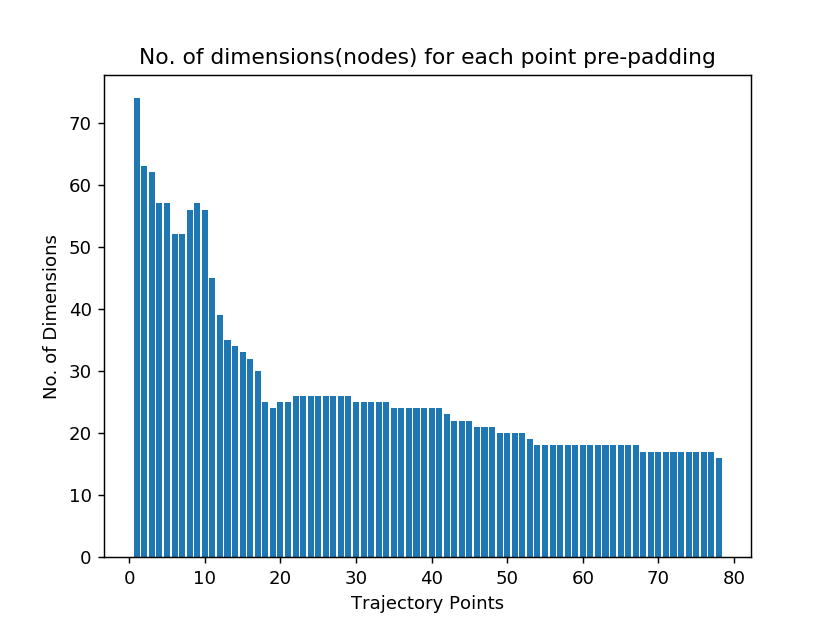

Text(0.5, 1.0, 'No. of dimensions(nodes) for each point pre-padding')

In [283]:
fig = plt.figure()
plt.bar(range(start_slice, len(vectors)-1+start_slice),[len(i) for i in vectors[1:]])
plt.xlabel('Trajectory Points')
plt.ylabel('No. of Dimensions')
plt.title("No. of dimensions(nodes) for each point pre-padding")

cosine distance

<IPython.core.display.Javascript object>


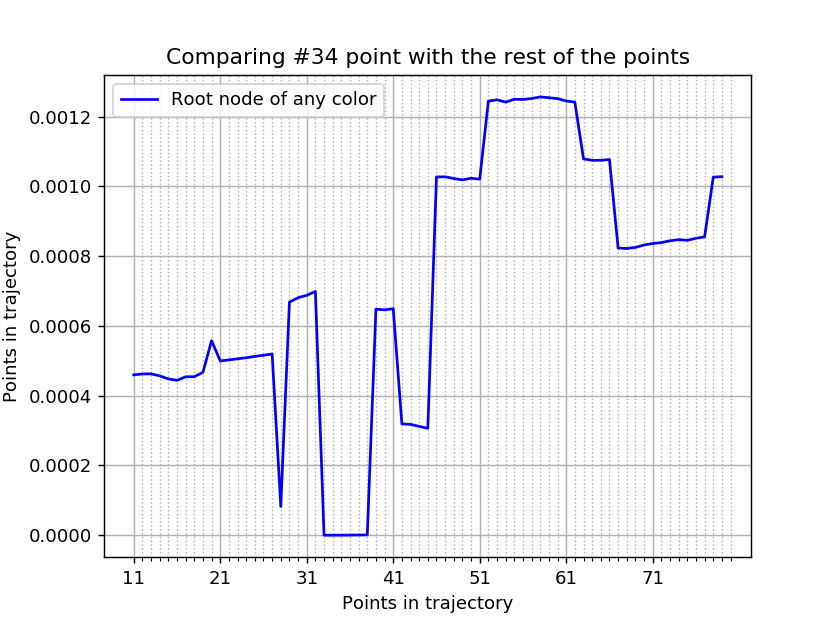

In [277]:
D = pairwise_distances(padded_vectors, metric='cosine')
#plot_distance_matrix(D)
plot_distance_graph(D, 34, start_slice=start_slice)

manhattan distance

<IPython.core.display.Javascript object>


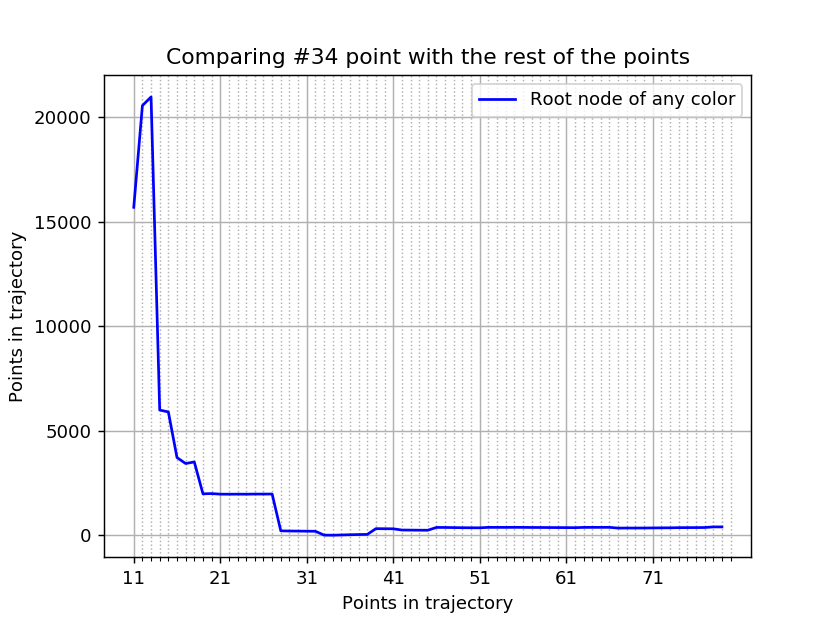

In [259]:
D = pairwise_distances(padded_vectors, metric='manhattan')
#plot_distance_matrix(D)
plot_distance_graph(D, 34, start_slice=start_slice)

cosine over trajectories

In [266]:
trajectories = [('0.56','2.8','1'),('0.56','2.8','2'),('0.56','2.8','3'),('0.56','2.8','4'),('0.56','2.8','5')]
#trajectories = [('0.52','2.8','1')]
start_slice = 11

In [267]:
vectors = []
for trajectory in trajectories:
    
    phi = trajectory[0]
    chi = trajectory[1]
    replica = trajectory[2]
    
    # load graphs for the trajectory
    graphs = get_graph_from_file(phi, chi, replica)[start_slice:]

    # traverse the graph and create vector
    vectors += generate_vectors(graphs)

# pad the vector
padded_vectors = generate_padded_vectors(vectors)

> 80 points loaded from file BR0.56-CHI2.8-R1.file.
> 80 points loaded from file BR0.56-CHI2.8-R2.file.
> 80 points loaded from file BR0.56-CHI2.8-R3.file.
> 80 points loaded from file BR0.56-CHI2.8-R4.file.
> 80 points loaded from file BR0.56-CHI2.8-R5.file.
> Padding to max dimension - 75


<IPython.core.display.Javascript object>


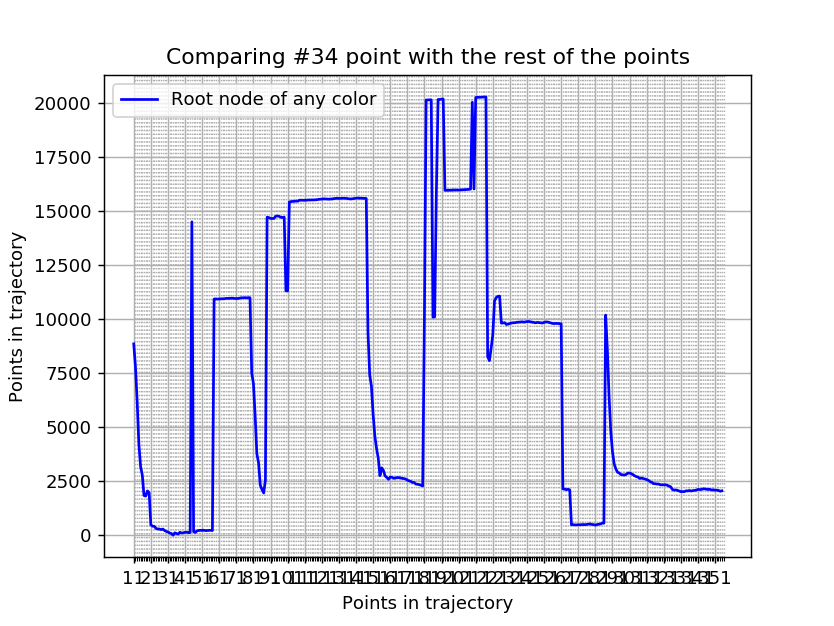

In [269]:
D = pairwise_distances(padded_vectors, metric='manhattan')
#plot_distance_matrix(D)
plot_distance_graph(D, 34, start_slice=start_slice)